In [1]:
import sys
sys.path.append('/home/ibibers/XAI_features_selection')
from CICIDS2017 import data_preprocessing 


le, X, y, X_train, X_test, y_train, y_test, df = data_preprocessing()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IA

/home/ibibers/XAI_features_selection/CICIDS2017.py:79: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


Unique Labels Before: ['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']
Unique Labels After: ['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration' 'Brute Force' 'XSS'
 'Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']


/home/ibibers/XAI_features_selection/CICIDS2017.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Label"].replace(label_mapping, inplace=True)


In [2]:
# ---------------------------------------- XGBoost Model ----------------------------------------

from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.4,max_depth=7, method='logloss')

# model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)



/home/ibibers/.venv/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:59:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              method='logloss', min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [5]:
# ---------------------------------------- SHAP XAI method ----------------------------------------
from XAI_Methods import XAI_Methods
xai_shap = XAI_Methods(model=model, X_train=X_train)

# # Compute SHAP importance

print("Before SHAP computation...")
shap_importance = xai_shap.shap_importance()
print("SHAP importance computed.")



Before SHAP computation...
SHAP importance computed.


In [6]:
shap_importance.to_csv("recov_shap_importance.csv", index=False)


In [7]:
print ("SHAP importance: ", shap_importance)

SHAP importance:                      Feature  Importance
0          Destination Port    1.107616
56   Init_Win_bytes_forward    0.559893
57  Init_Win_bytes_backward    0.510014
59     min_seg_size_forward    0.362466
17             Flow IAT Min    0.271366
..                      ...         ...
45           CWE Flag Count    0.000000
55        Subflow Bwd Bytes    0.000000
54      Subflow Bwd Packets    0.000000
53        Subflow Fwd Bytes    0.000000
52      Subflow Fwd Packets    0.000000

[68 rows x 2 columns]


In [8]:
print("Top 25 Features:")
print(shap_importance.head(25))

xai_shap.save_importance(shap_importance, file_path="shap_feature_importance.csv", file_format="csv")


Top 25 Features:
                        Feature  Importance
0              Destination Port    1.107616
56       Init_Win_bytes_forward    0.559893
57      Init_Win_bytes_backward    0.510014
59         min_seg_size_forward    0.362466
17                 Flow IAT Min    0.271366
22                  Fwd IAT Min    0.247700
33                Bwd Packets/s    0.215137
36           Packet Length Mean    0.209154
6         Fwd Packet Length Max    0.206545
1                 Flow Duration    0.204824
16                 Flow IAT Max    0.170372
19                 Fwd IAT Mean    0.162422
21                  Fwd IAT Max    0.159331
14                Flow IAT Mean    0.156538
13        Bwd Packet Length Std    0.145400
32                Fwd Packets/s    0.138245
4   Total Length of Fwd Packets    0.131791
20                  Fwd IAT Std    0.126699
30            Fwd Header Length    0.124675
12       Bwd Packet Length Mean    0.121613
44               URG Flag Count    0.108279
5   Total Lengt

In [17]:
import pandas as pd
shap_importance = pd.read_csv("recov_shap_importance.csv")

In [ ]:
# Top Features: ['Destination Port', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'min_seg_size_forward', 'Packet Length Mean', 'Flow IAT Min', 'Bwd Packets/s', 'Fwd IAT Min', 'Fwd Packet Length Max', 'Flow Duration']
xai_shap.plot_top_features(shap_importance, top_n=25)

In [13]:
# print("Shape of shap_values:", np.array(shap_values).shape)
# print("Shape of X_train:", X_train.shape)


Shape of shap_values: (2016638, 68, 15)
Shape of X_train: (2016638, 68)


In [4]:
# -------------------------------------------- LEAVE-ONE-COVARIATE-OUT (LOCO)  --------------------------------------------
from XAI_Methods import LOCO_XAI_Methods
xai_loco = LOCO_XAI_Methods(model=model, X_train=X_train, y_train=y_train)


/home/ibibers/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-09 22:44:19.517743: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-09 22:44:19.528655: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736480659.540773 3348178 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736480659.544130 3348178 cuda_blas.cc:1418] Unable to 

In [5]:
loco_importance = xai_loco.loco_importance()

/home/ibibers/.venv/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:46:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ibibers/.venv/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:47:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ibibers/.venv/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:49:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ibibers/.venv/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:50:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "method" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ibibers/.venv/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:51:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "method" } 

In [6]:
print ("LOCO feature importance", loco_importance)
xai_loco.save_importance(loco_importance, file_path="loco_feature_importance.csv", file_format="csv")


LOCO feature importance                     Feature  LOCO Importance
56   Init_Win_bytes_forward     5.097593e-04
0          Destination Port     1.745479e-04
17             Flow IAT Min     8.826572e-05
22              Fwd IAT Min     7.140597e-05
57  Init_Win_bytes_backward     2.727311e-05
..                      ...              ...
51      Fwd Header Length.1     0.000000e+00
55        Subflow Bwd Bytes     0.000000e+00
63               Active Min    -4.958748e-07
59     min_seg_size_forward    -1.487624e-06
35        Max Packet Length    -2.975249e-06

[68 rows x 2 columns]
LOCO importance saved to loco_feature_importance.csv in csv format.


In [7]:

print("Top 25 Features by LOCO Importance:")
print(loco_importance.head(25))


Top 25 Features by LOCO Importance:
                    Feature  LOCO Importance
56   Init_Win_bytes_forward         0.000510
0          Destination Port         0.000175
17             Flow IAT Min         0.000088
22              Fwd IAT Min         0.000071
57  Init_Win_bytes_backward         0.000027
25              Bwd IAT Std         0.000024
20              Fwd IAT Std         0.000023
18            Fwd IAT Total         0.000017
15             Flow IAT Std         0.000017
6     Fwd Packet Length Max         0.000015
32            Fwd Packets/s         0.000015
39           FIN Flag Count         0.000014
7     Fwd Packet Length Min         0.000012
1             Flow Duration         0.000011
19             Fwd IAT Mean         0.000011
11    Bwd Packet Length Min         0.000010
10    Bwd Packet Length Max         0.000010
36       Packet Length Mean         0.000009
48      Average Packet Size         0.000009
24             Bwd IAT Mean         0.000009
16             Flow

/home/ibibers/XAI_features_selection/XAI_Methods.py:202: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features["LOCO Importance"], y=top_features["Feature"], palette="viridis")


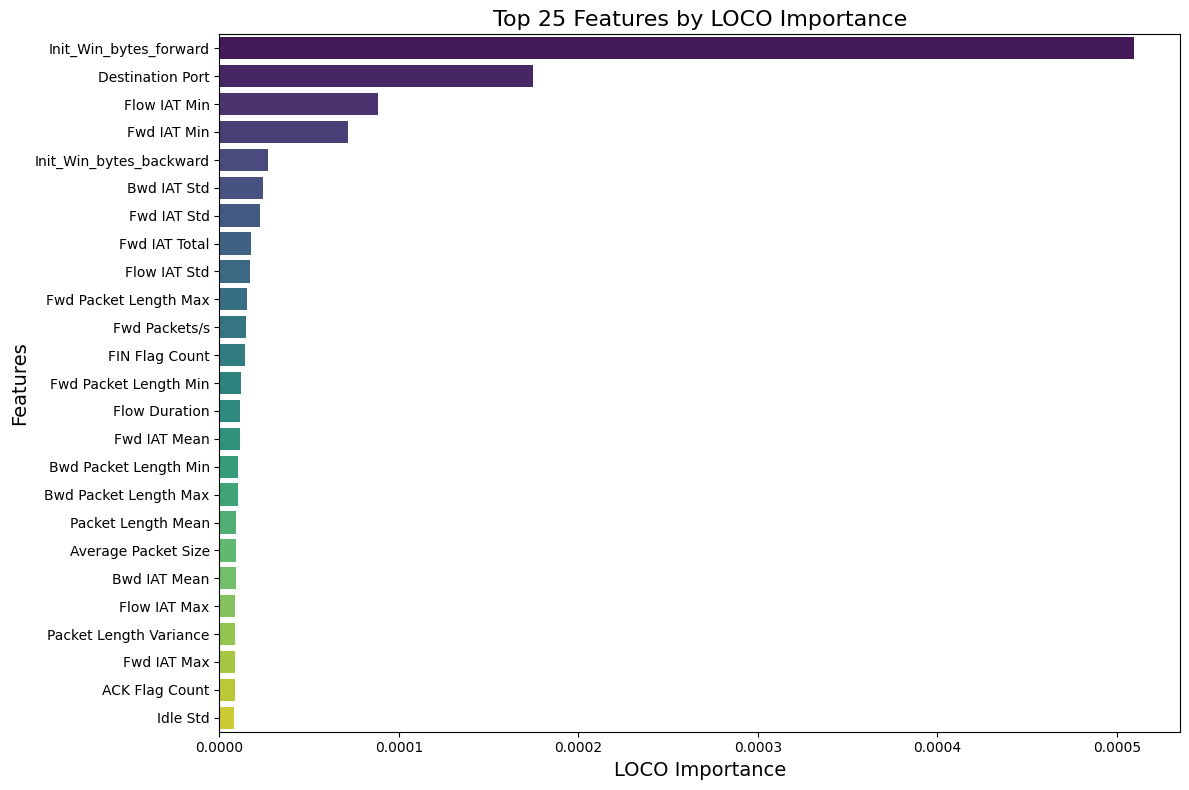

In [8]:

xai_loco.plot_top_features(loco_importance, top_n=25)

In [ ]:

# Create an instance of the class
# xai = CEM_XAI_Methods(model, X_train)

# Calculate feature importance for a specific instance
# instance_idx = 0 
# feature_importance = xai.cem_importance(instance_idx)

# if feature_importance is not None:
#     print(feature_importance)
#     # Save the feature importance (optional)
#     xai.save_importance(feature_importance, "feature_importance.csv") 

In [4]:
# ----------------------------------------- CEM (Conditional Expectation of the Model) 
import pandas as pd
from XAI_Methods import CEM_XAI_Methods

CEM_xai = CEM_XAI_Methods(model=model, X_train=X_train)


/home/ibibers/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-11 15:04:07.524077: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-11 15:04:07.534945: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736625847.546865 3364451 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736625847.550317 3364451 cuda_blas.cc:1418] Unable to 

In [5]:
# ---------------------------------------- CEM (Pertinent Negative) ----------------------------------------
# # Compute CEM feature importance for N instance (pertinent negatives)
# Compute CEM feature importance for the first 7 instances
# cem_importance_pn = CEM_xai.cem_importance(instance_idx=0, mode="PN")


all_importances = []
for i in range(7):
    importance = CEM_xai.cem_importance(instance_idx=i, mode="PN") 
    if importance is not None:  
        importance["Instance"] = i 
        all_importances.append(importance)




AttributeError: module 'keras._tf_keras.keras.backend' has no attribute 'get_session'

In [ ]:

# Combine results into a single DataFrame
# Combine all importance data into a single DataFrame
all_importances_df = pd.concat(all_importances, ignore_index=True)
print(all_importances_df) = pd.concat(all_importances, ignore_index=True)

# Save combined results
all_importances_df.to_csv("cem_PN_multiple_instances.csv", index=False)
print("CEM_PN importance computed for multiple instances.")


In [ ]:

# ---------------------------------------- CEM (Pertinent Positive) ----------------------------------------


# # Compute CEM feature importance for N instance (pertinent postive)
# Compute CEM feature importance for the first 7 instances
all_importances_ = []
for i in range(7):  
    importance = CEM_xai.cem_importance(instance_idx=i, mode="PP")
    importance["Instance"] = i  
    all_importances_.append(importance)

# Combine results into a single DataFrame
combined_importance = pd.concat(all_importances_, ignore_index=True)

# Save combined results
combined_importance.to_csv("cem_PP_multiple_instances.csv", index=False)
print("CEM_PP importance computed for multiple instances.")





# cem_importance_pn = CEM_xai.cem_importance(instance_idx=0, mode="PN")

# # Save the feature importance to a CSV file
# CEM_xai.save_importance(cem_importance_pn, file_path="cem_pn_importance.csv", file_format="csv")

# # Print the top 25 features
# print("Top 25 Features for Pertinent Negatives:")
# print(cem_importance_pn.head(25))

# # Compute CEM feature importance for instance 0 (pertinent positives)
# cem_importance_pp = CEM_xai.cem_importance(instance_idx=0, mode="PP")

# # Save the feature importance to a CSV file
# CEM_xai.save_importance(cem_importance_pp, file_path="cem_pp_importance.csv", file_format="csv")

# # Print the top 10 features
# print("Top 10 Features for Pertinent Positives:")
# print(cem_importance_pp.head(10))



In [3]:
# -------------------------------------------------------------- PERMUTATION FEATURE IMPORTANCE (PFI) --------------------------------------------------------------
from XAI_Methods import PFI_XAI_Methods

pfi_xai = PFI_XAI_Methods(
    model=model, 
    X_train=X_train, 
    y_train=y_train, 
    X_val=X_test, 
    y_val=y_test, 
    feature_names=X_train.columns.tolist()
)
print ("Before PFI computation...")

/home/ibibers/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-10 16:25:50.105668: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-10 16:25:50.116576: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736544350.128723 3353677 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736544350.132122 3353677 cuda_blas.cc:1418] Unable to 

Before PFI computation...


In [4]:
pfi_result = pfi_xai.compute_pfi()

In [8]:
print ("The top 25 features are:\n ", pfi_result.head(25))

The top 25 features are:
                          Feature  Importance Mean  Importance Std
13        Bwd Packet Length Std         0.031210        0.000087
0              Destination Port         0.024604        0.000167
56       Init_Win_bytes_forward         0.019990        0.000142
4   Total Length of Fwd Packets         0.014079        0.000046
42               PSH Flag Count         0.011955        0.000091
11        Bwd Packet Length Min         0.008095        0.000088
5   Total Length of Bwd Packets         0.007274        0.000063
33                Bwd Packets/s         0.003755        0.000043
48          Average Packet Size         0.003606        0.000034
36           Packet Length Mean         0.003203        0.000041
17                 Flow IAT Min         0.003180        0.000070
31            Bwd Header Length         0.002810        0.000043
22                  Fwd IAT Min         0.002435        0.000027
59         min_seg_size_forward         0.002418        0.00005

In [6]:

pfi_xai.save_importance(pfi_result, file_path="pfi_feature_importance.csv")


Saved feature importance to pfi_feature_importance.csv


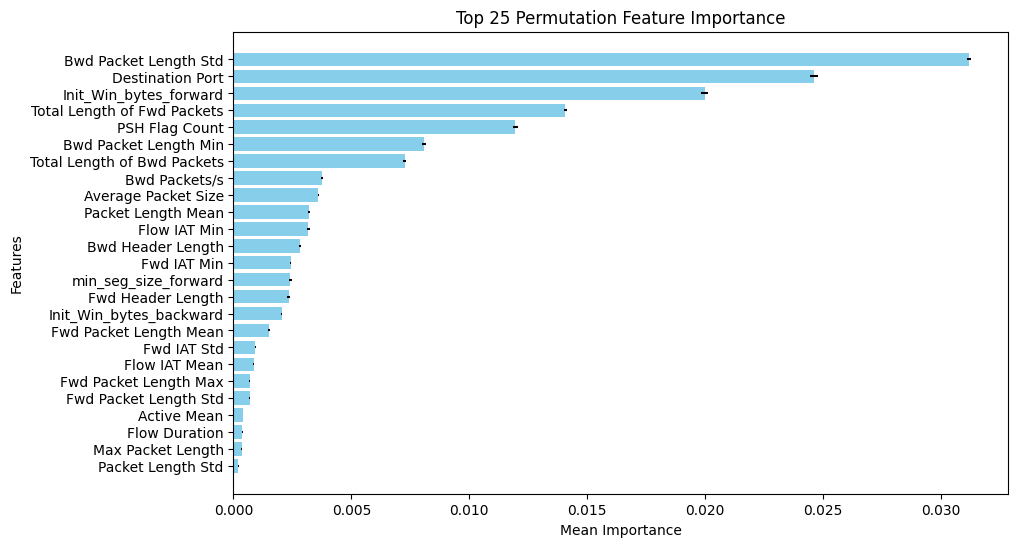

In [7]:

pfi_xai.plot_importance(pfi_result, top_n=25)


In [3]:
# -------------------------------------------------------------- dalex --------------------------------------------------------------
from XAI_Methods import dalex_XAI_Methods
dalex_xai = dalex_XAI_Methods(model=model, X_train=X_train, y_train= y_train)


/home/ibibers/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-11 01:39:48.693644: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-11 01:39:48.704701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736577588.716791 3361343 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736577588.720233 3361343 cuda_blas.cc:1418] Unable to 

In [4]:
dalex_importance = dalex_xai.dalex_importance()

Preparation of a new explainer is initiated

  -> data              : 2016638 rows 68 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 2016638 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Model Explainer
  -> predict function  : <function yhat_proba_default at 0x7e83a47f9000> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 2.83e-13, mean = 0.000773, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.782, mean = 0.974, max = 14.0
  -> model_info        : package xgboost

A new explainer has been created!
DALEX Explainer initialized.


In [5]:
print("Top 25 Features:")
print(dalex_importance.head(25))

Top 25 Features:
                  Feature  Importance
68           Fwd IAT Mean    0.629117
67      Min Packet Length    0.485779
66            Bwd IAT Std    0.428611
65          Fwd IAT Total    0.243110
64           Flow IAT Std    0.193186
63  Bwd Packet Length Max    0.181887
62      Max Packet Length    0.180659
61             Active Min    0.104098
60    Average Packet Size    0.102769
59          Fwd Packets/s    0.099195
58      Total Fwd Packets    0.087960
57          Down/Up Ratio    0.044197
56             Active Max    0.042150
55           Flow IAT Max    0.013979
54          Fwd PSH Flags    0.005894
53            Active Mean    0.005514
52               Idle Std    0.004483
48    Subflow Bwd Packets    0.000000
47    Subflow Fwd Packets    0.000000
46         CWE Flag Count    0.000000
45         RST Flag Count    0.000000
44         SYN Flag Count    0.000000
43          Fwd URG Flags    0.000000
51           _full_model_    0.000000
49      Subflow Fwd Bytes    0.00

In [6]:
dalex_xai.save_importance(dalex_importance, file_path="dalex_feature_importance.csv", file_format="csv")

Feature importance saved to dalex_feature_importance.csv in csv format.


/home/ibibers/XAI_features_selection/XAI_Methods.py:426: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x="Importance", y="Feature", palette="viridis")


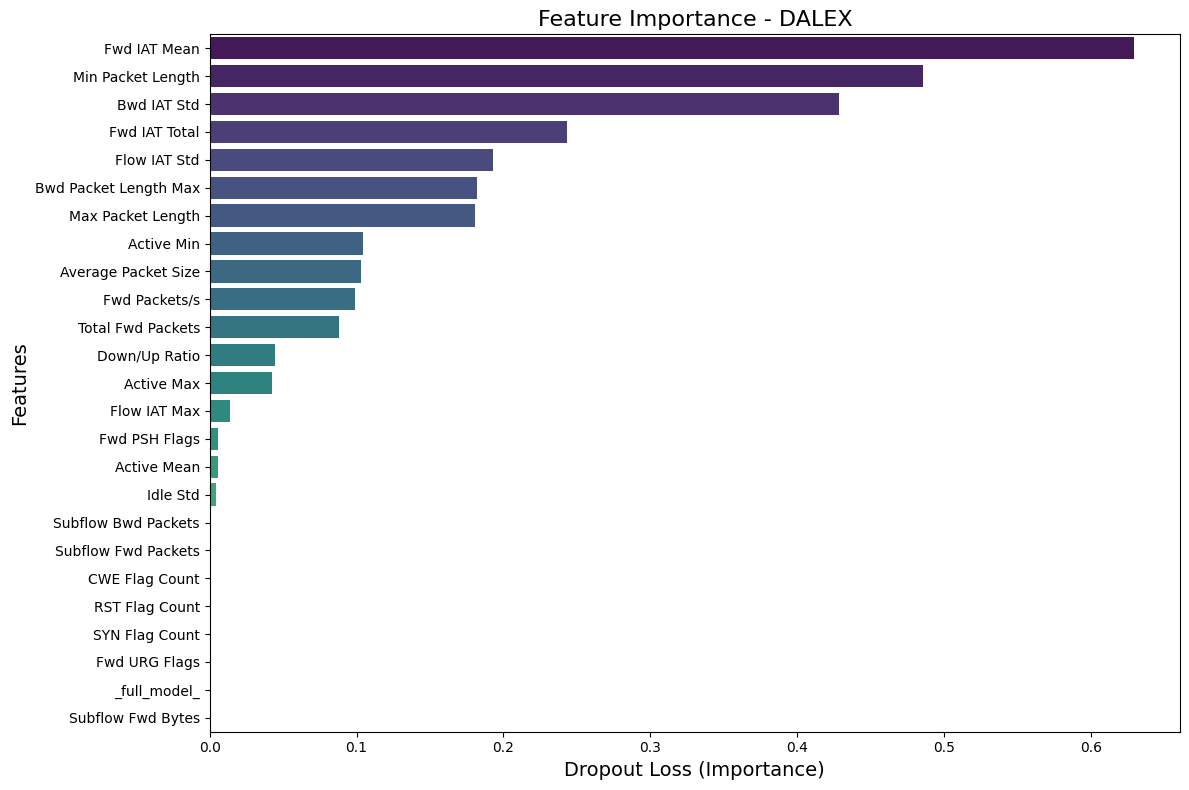

In [7]:
dalex_xai.plot_importance(dalex_importance, top_n=25)

In [3]:
# ------------------------------------------------------------- PROFILED WEIGHTING (PROFWEIGHT) -------------------------------------------------------------
from XAI_Methods import profweight_XAI_Methods
profweight_xai = profweight_XAI_Methods(model, X_train, y_train)


/home/ibibers/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-11 02:04:44.554427: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-11 02:04:44.565479: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736579084.577458 3362039 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736579084.580873 3362039 cuda_blas.cc:1418] Unable to 

In [4]:
profweight_importance = profweight_xai.compute_profweight(weighting_method="class_probabilities")

In [5]:
print ("The top 25 features are:\n ", profweight_importance.head(25))

The top 25 features are:
                     Feature    Importance
1            Flow Duration  1.659534e+07
18           Fwd IAT Total  1.625462e+07
23           Bwd IAT Total  1.111271e+07
16            Flow IAT Max  1.029776e+07
21             Fwd IAT Max  1.014054e+07
66                Idle Max  9.761095e+06
64               Idle Mean  9.335829e+06
67                Idle Min  8.892240e+06
26             Bwd IAT Max  5.258112e+06
20             Fwd IAT Std  3.665299e+06
15            Flow IAT Std  3.277610e+06
19            Fwd IAT Mean  2.921598e+06
24            Bwd IAT Mean  2.029854e+06
25             Bwd IAT Std  1.666259e+06
14           Flow IAT Mean  1.448062e+06
22             Fwd IAT Min  1.139518e+06
27             Bwd IAT Min  1.089283e+06
65                Idle Std  5.642459e+05
38  Packet Length Variance  5.455691e+05
62              Active Max  1.724481e+05
17            Flow IAT Min  1.720706e+05
60             Active Mean  9.178807e+04
63              Active Min  6.

In [6]:
profweight_xai.save_importance(profweight_importance, "profweight_importance.csv")

Feature importance saved to profweight_importance.csv in csv format.


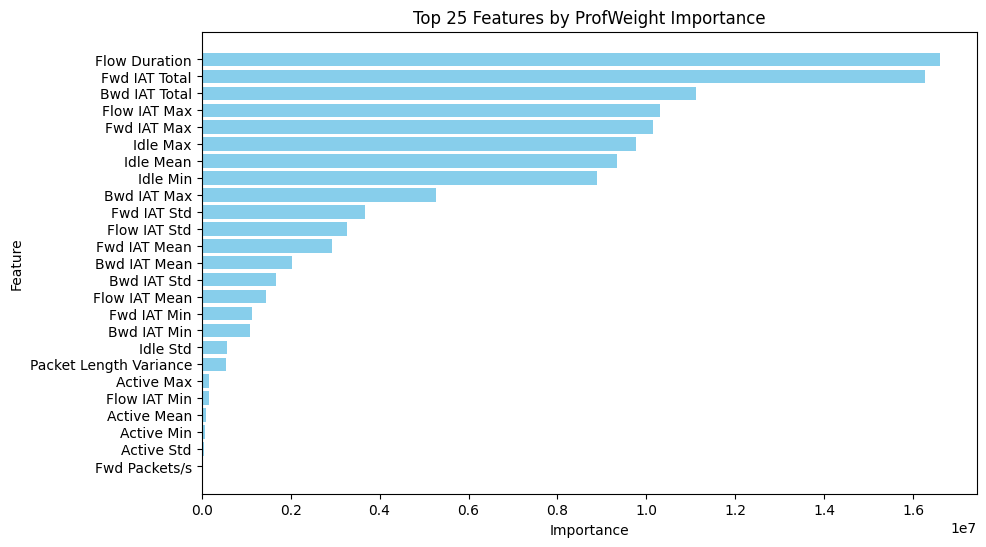

In [7]:
profweight_xai.plot_top_features(profweight_importance, top_n=25)

In [8]:
import pandas as pd 
shap_importance = pd.read_csv("shap_feature_importance.csv")
 
shap_features_importance_List = shap_importance["Feature"].head(25).tolist()

In [14]:
num_top_ranks = 10
rank_weights = {rank: (num_top_ranks - rank + 1) for rank in range(1, num_top_ranks + 1)}
print ("Rank weights: ", rank_weights)

Rank weights:  {1: 10, 2: 9, 3: 8, 4: 7, 5: 6, 6: 5, 7: 4, 8: 3, 9: 2, 10: 1}


In [7]:
# ------------------------------------------------------------- Thos step we do a feature ensemble by frequency analysis of top features extracted from each method -------------------------------------------------------------
import pandas as pd 

def calculate_final_feature_importance(feature_files, num_top_ranks):
    """
    Calculate the final feature importance scores by aggregating rankings from multiple methods.
    
    Parameters:
        feature_files (list of str): List of file paths to CSV files containing feature importance rankings.
        num_top_ranks (int): Number of top ranks to consider for weighted scoring. Default is 10.
        
    Returns:
        pd.DataFrame: DataFrame with features and their final importance scores.
    """
    feature_scores = {}
    
    # Scoring weights N number of features
    rank_weights = {rank: (num_top_ranks - rank + 1) for rank in range(1, num_top_ranks + 1)}

    for file in feature_files:
        df = pd.read_csv(file)

        # Iterate through the N features and assign points
        for rank in range(1, num_top_ranks + 1):  
            if rank <= len(df):  
                feature = df.iloc[rank - 1]['Feature']
                feature_scores[feature] = feature_scores.get(feature, 0) + rank_weights[rank]

    scores_df = pd.DataFrame(list(feature_scores.items()), columns=['Feature', 'Final Importance Score'])
    
    scores_df = scores_df.sort_values(by='Final Importance Score', ascending=False).reset_index(drop=True)

    return scores_df




In [8]:
import matplotlib.pyplot as plt

def plot_all_features(scores_df, num_features_to_plot=None):
    """
    Plot all features by their final importance scores.
    
    Parameters:
        scores_df (pd.DataFrame): DataFrame with features and their final importance scores.
        num_features_to_plot (int, optional): Number of top features to visualize. If None, plot all features.
    """
    if num_features_to_plot is None:
        num_features_to_plot = len(scores_df)
    top_features = scores_df.head(num_features_to_plot)

    plt.figure(figsize=(12, 0.3 * num_features_to_plot))  
    plt.barh(top_features['Feature'], top_features['Final Importance Score'], color='skyblue')
    plt.xlabel('Final Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title(f'Top {num_features_to_plot} Features by Final Importance Score', fontsize=14)
    plt.gca().invert_yaxis()  
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=8)  
    plt.tight_layout()
    plt.show()


In [9]:
# # Extract top features from each method we used before
# # shap_importance = pd.read_csv("shap_feature_importance.csv")
# # # shap_importance.head(25)
# # loco_importance = pd.read_csv("loco_feature_importance.csv")
# # pfi_importance = pd.read_csv("pfi_feature_importance.csv")
# # dalex_importance = pd.read_csv("dalex_feature_importance.csv")
# # profweight_importance = pd.read_csv("profweight_importance.csv")
# feature_ensemble = pd.read_csv("feature_ensemble_final_feature_importance_scores.csv")
feature_files = [
    "shap_feature_importance.csv",
    "loco_feature_importance.csv",
    "pfi_feature_importance.csv",
    "dalex_feature_importance.csv",
    "profweight_importance.csv"
]

final_scores = calculate_final_feature_importance(feature_files, num_top_ranks=68)


In [10]:
display(final_scores.head(68))

,Feature,Final Importance Score
0,Fwd IAT Total,268
1,Fwd IAT Min,265
2,Flow IAT Max,262
3,Fwd IAT Mean,262
4,Flow IAT Min,248
...,...,...
63,RST Flag Count,85
64,Subflow Bwd Packets,82
65,Subflow Fwd Packets,80
66,ECE Flag Count,76


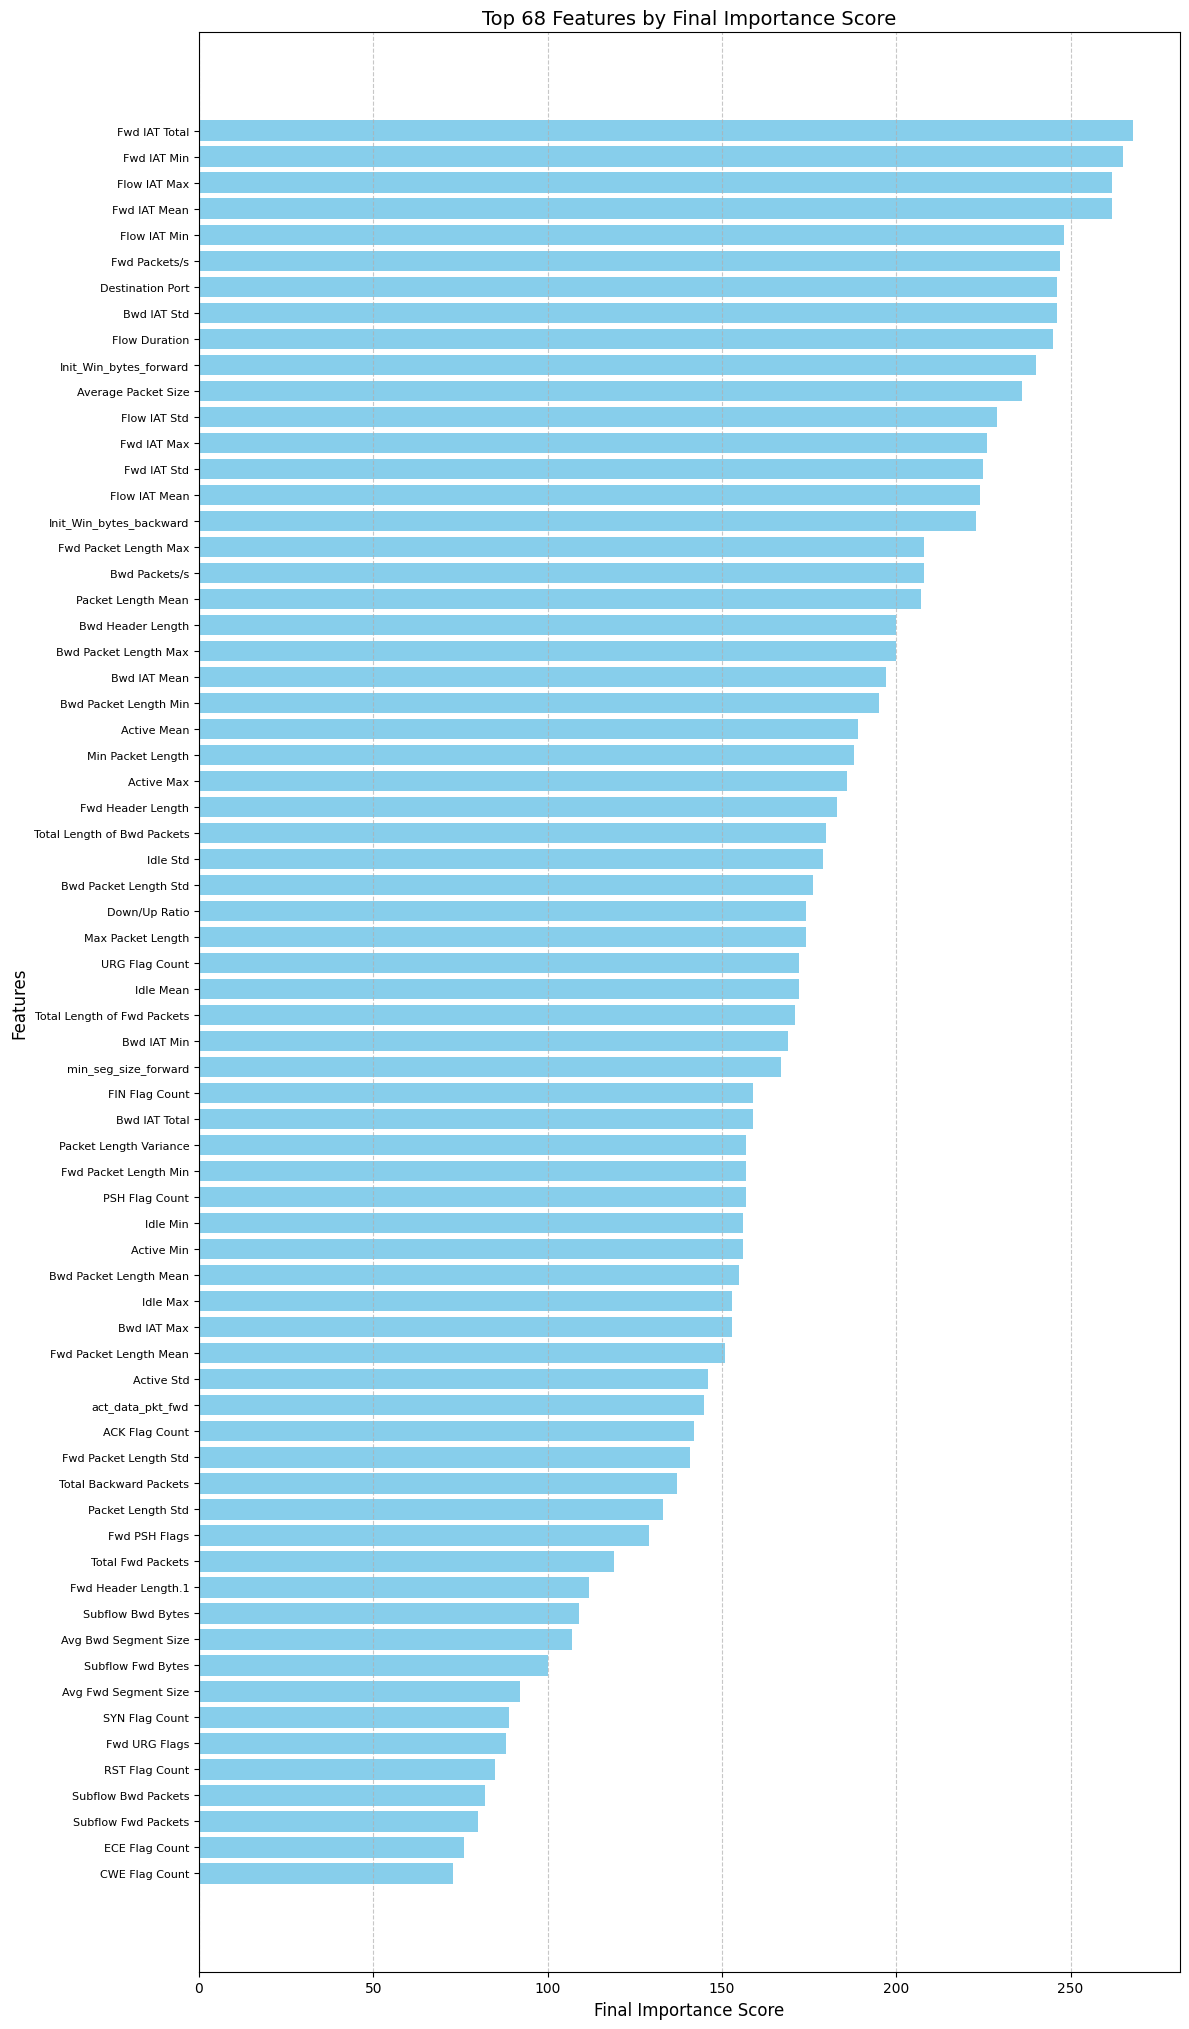

In [11]:
plot_all_features(final_scores, num_features_to_plot=68)

In [12]:

final_scores.to_csv("feature_ensemble_final_feature_importance_scores.csv", index=False)